In [60]:
import numpy as np

In [61]:
# Task 3A
def polynomial_regression(xs, ys, n):
    a = np.array([np.array([sum([x ** (i + j) for x in xs]) * 1.0 / len(xs) for j in range(n + 1)]) for i in range(n + 1)])
    b = np.array([sum([x ** i * y for x, y in zip(xs, ys)]) * 1.0 / len(xs) for i in range(n + 1)])
    return np.linalg.solve(a, b)

In [62]:
# Test 1
xs = [i for i in range(10)]
ys = [3 for i in range(10)]
n = 0
alphas = polynomial_regression(xs, ys, n)
assert(len(alphas) == n + 1)
assert(sum([(sum([alpha * x ** i for i, alpha  in zip(range(n + 1), alphas)]) - y) ** 2 for x, y in zip(xs, ys)]) < 1e-5)

In [63]:
# Test 2
xs = [i for i in range(10)]
ys = [np.random.randint(low = -10, high = 10) for i in range(10)]
n = 10
alphas = polynomial_regression(xs, ys, n)
assert(len(alphas) == n + 1)
assert(sum([(sum([alpha * x ** i for i, alpha  in zip(range(n + 1), alphas)]) - y) ** 2 for x, y in zip(xs, ys)]) < 1e-5)

In [64]:
# Task 3B
def func(ps, state):
    return calc_func(ps, state[0], state[1], state[2]) / len(ps)

def calc_func(ps, x0, y0, r):
    p0 = np.array([x0, y0])
    return sum([(np.linalg.norm(p - p0) - r) ** 2 for p in ps])

def func_grad(ps, state):
    return calc_func_grad(ps, state[0], state[1], state[2]) / len(ps)

def calc_func_grad(ps, x0, y0, r):
    p0 = np.array([x0, y0])
    return np.array([
        sum([2 * (x0 - p[0]) * (np.linalg.norm(p0 - p) - r) / np.linalg.norm(p0 - p) for p in ps]),
        sum([2 * (y0 - p[1]) * (np.linalg.norm(p0 - p) - r) / np.linalg.norm(p0 - p) for p in ps]),
        sum([2 * (r - np.linalg.norm(p0 - p)) for p in ps])
    ])

def round_approximation(ps, max_iterations):
    alpha = 0.1
    x0 = sum([p[0] for p in ps]) / len(ps)
    y0 = sum([p[1] for p in ps]) / len(ps)
    r = (max([p[0] for p in ps]) - min([p[0] for p in ps])) / 2.0
    cur_state = np.array([x0, y0, r])
    trajectory = [cur_state]
    
    for i in range(max_iterations):
        cur_state = cur_state - alpha * func_grad(ps, cur_state)
        trajectory.append(cur_state)
    return trajectory

In [65]:
# Test
a = np.array([0, 0])
b = np.array([0, 10])
for i in range(20):
    c = np.array([1 + np.random.randint(low = 0, high = 10), 1 + np.random.randint(low = 0, high = 10)])
    ps = [a, b, c]
    assert(func(ps, round_approximation(ps, 3000)[-1]) < 1e-2)

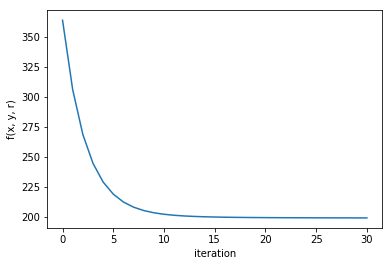

In [66]:
import matplotlib.pyplot as plt

ps = [[np.random.randint(low = 0, high = 100), np.random.randint(low = 0, high = 100)] for i in range(100)]
trajectory = round_approximation(ps, 30)
fig, ax = plt.subplots()
ax.plot(range(len(trajectory)), [ func(ps, p) for p in trajectory ])
plt.xlabel("iteration")
plt.ylabel("f(x, y, r)")
plt.show()
plt.close()